<a href="https://colab.research.google.com/github/noelmt7/LAB-3/blob/main/23485338_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

In [3]:
df = pd.read_csv('/content/Market_Basket_Optimisation.csv')
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(7500, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [6]:
df.isna().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [7]:
df = df.drop(columns = ['olive oil'], axis =1 )
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
transactions = []
for i in range(0,df.shape[0]):
    transactions.append([str(df.values[i,j])for j in range(0,df.shape[1])])


In [9]:
transactions = []
for i in range(0,df.shape[0]):
    transactions.append([str(df.values[i,j])for j in range(0,df.shape[1])])


In [10]:
transactions = []

for i in range(0, df.shape[0]):
    transaction = [str(df.values[i, j]) for j in range(0, df.shape[1]) if str(df.values[i, j]) != 'nan']
    transactions.append(transaction)


In [11]:
unique_items_set = set()
for transaction in transactions:
    unique_items_set.update(item for item in transaction)
unique_items_list = list(unique_items_set)

In [12]:
len(unique_items_list)

120

In [13]:
binary_matrix = pd.DataFrame(columns=unique_items_list)

# Populate the DataFrame with binary values using pandas.concat
data = []
for transaction in transactions:
    row = [1 if item in transaction else 0 for item in unique_items_list]
    data.append(row)

binary_matrix = pd.concat([binary_matrix, pd.DataFrame(data, columns=unique_items_list)], ignore_index=True)

print(binary_matrix)


     shrimp mint nonfat milk toothpaste candy bars eggplant meatballs muffins  \
0         0    0           0          0          0        0         1       0   
1         0    0           0          0          0        0         0       0   
2         0    0           0          0          0        0         0       0   
3         0    0           0          0          0        0         0       0   
4         0    0           0          0          0        0         0       0   
...     ...  ...         ...        ...        ...      ...       ...     ...   
7495      0    0           0          0          0        0         0       0   
7496      0    0           0          0          0        0         0       0   
7497      0    0           0          0          0        0         0       0   
7498      0    0           0          0          0        0         0       0   
7499      0    0           0          0          0        0         0       0   

     white wine extra dark 

In [14]:
top10=binary_matrix.sum().sort_values(ascending=False)[:10]
top10

mineral water        1787
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1229
green tea             990
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
dtype: object

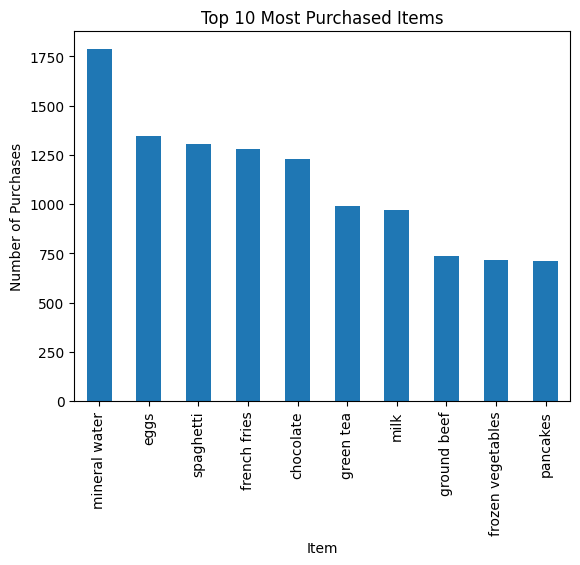

In [15]:
top10.plot(kind='bar')
plt.xlabel("Item")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Most Purchased Items")
plt.show()

In [16]:
bottom10=binary_matrix.sum().sort_values(ascending=True)[:10]
bottom10


 asparagus          1
water spray         3
napkins             5
cream               7
bramble            14
tea                29
chutney            31
mashed potato      31
chocolate bread    32
dessert wine       33
dtype: object

In [1]:
bottom10.plot(kind='bar')
plt.xlabel("Item")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Least Purchased Items")
plt.show()

NameError: ignored

In [17]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach']

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in categorical_columns:
    # Convert all values to strings
    df[column] = df[column].astype(str)

    # Fit and transform the LabelEncoder
    df[column] = le.fit_transform(df[column])

# Now your categorical columns are encoded as integers
df

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach
0,14,67,34,73,71,71,69,68,62,55,45,36,28,19,12,5,2,0,2
1,26,75,74,73,71,71,69,68,62,55,45,36,28,19,12,5,2,0,2
2,107,3,74,73,71,71,69,68,62,55,45,36,28,19,12,5,2,0,2
3,71,69,35,111,49,71,69,68,62,55,45,36,28,19,12,5,2,0,2
4,64,75,74,73,71,71,69,68,62,55,45,36,28,19,12,5,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,15,62,42,73,71,71,69,68,62,55,45,36,28,19,12,5,2,0,2
7496,14,47,34,40,60,49,69,68,62,55,45,36,28,19,12,5,2,0,2
7497,22,75,74,73,71,71,69,68,62,55,45,36,28,19,12,5,2,0,2
7498,39,52,74,73,71,71,69,68,62,55,45,36,28,19,12,5,2,0,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   shrimp             7500 non-null   int64
 1   almonds            7500 non-null   int64
 2   avocado            7500 non-null   int64
 3   vegetables mix     7500 non-null   int64
 4   green grapes       7500 non-null   int64
 5   whole weat flour   7500 non-null   int64
 6   yams               7500 non-null   int64
 7   cottage cheese     7500 non-null   int64
 8   energy drink       7500 non-null   int64
 9   tomato juice       7500 non-null   int64
 10  low fat yogurt     7500 non-null   int64
 11  green tea          7500 non-null   int64
 12  honey              7500 non-null   int64
 13  salad              7500 non-null   int64
 14  mineral water      7500 non-null   int64
 15  salmon             7500 non-null   int64
 16  antioxydant juice  7500 non-null   int64
 17  frozen smoothi

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


# Convert the data to a binary matrix (0s and 1s) indicating whether each item was bought
basket_sets = df.applymap(lambda x: 1 if x > 0 else 0)

# Find frequent itemsets using Apriori
frequent_itemsets = apriori(basket_sets, min_support=0.06, use_colnames=True)

# Generate association rules
association_rules_df = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Sort rules by lift
association_rules_df = association_rules_df.sort_values(by=['lift'], ascending=False)

# Print the top association rules
association_rules_df


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
association_rules_df[(association_rules_df['confidence']>0.4) & (association_rules_df['lift']>1)]

In [ ]:
worst_choice=association_rules_df.sort_values(by='lift',ascending=True)
print('Least Bought together')
worst_choice[['antecedents','consequents','lift']]

In [ ]:
best_choice = association_rules_df.sort_values(by=['confidence', 'lift'], ascending=[False, False])
print('Best choice to buy items together')
best_choice[['antecedents', 'consequents', 'confidence','lift']]